In [1]:
import pandas as pd


In [2]:
#Ratings data
rating = pd.read_csv('../data/processed/rating.csv')
rating.head()


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
popularity_count = rating.groupby("item_id")["rating"].count()

top10_popular = popularity_count.sort_values(ascending=False).head(10)
print(top10_popular)



item_id
50     583
258    509
100    508
181    507
294    485
286    481
288    478
1      452
300    431
121    429
Name: rating, dtype: int64


In [4]:
avg_ratings = rating.groupby("item_id")["rating"].mean()

top10_avg = avg_ratings.sort_values(ascending=False).head(10)
print(top10_avg)


item_id
814     5.0
1599    5.0
1201    5.0
1122    5.0
1653    5.0
1293    5.0
1500    5.0
1189    5.0
1536    5.0
1467    5.0
Name: rating, dtype: float64


In [5]:
min_ratings = 20  # applying threshold to get avg rating which has been rated atleast 5 
filtered = rating.groupby("item_id").filter(lambda x: len(x) >= min_ratings)

avg_filtered = filtered.groupby("item_id")["rating"].mean().sort_values(ascending=False).head(10)
print(avg_filtered)

item_id
408    4.491071
318    4.466443
169    4.466102
483    4.456790
114    4.447761
64     4.445230
603    4.387560
12     4.385768
50     4.358491
178    4.344000
Name: rating, dtype: float64


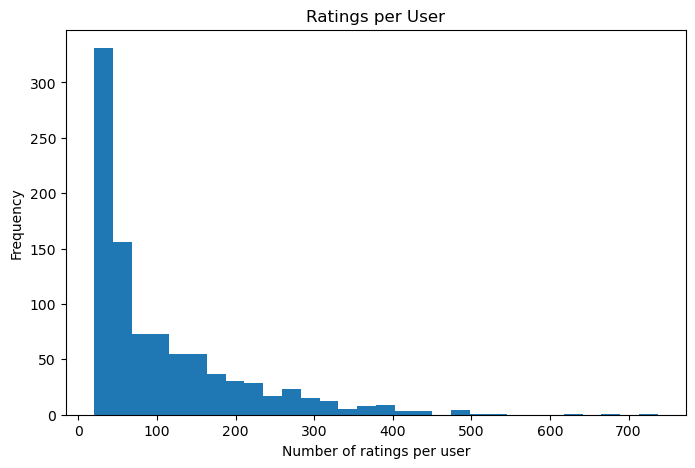

In [6]:
import matplotlib.pyplot as plt


ratings_per_user = rating.groupby("user_id")["rating"].count()

plt.figure(figsize=(8,5))
plt.hist(ratings_per_user, bins=30)
plt.xlabel("Number of ratings per user")
plt.ylabel("Frequency")
plt.title("Ratings per User")
plt.show()

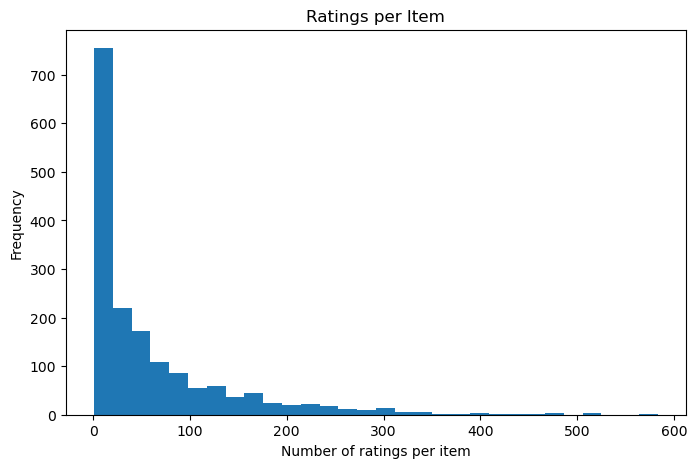

In [7]:
ratings_per_item = rating.groupby("item_id")["rating"].count()

plt.figure(figsize=(8,5))
plt.hist(ratings_per_item, bins=30)
plt.xlabel("Number of ratings per item")
plt.ylabel("Frequency")
plt.title("Ratings per Item")
plt.show()
